# Recurrent Neural Networks
---
# Predicting Stock Prices through an LSTM model

In [1]:
import tensorflow as tf

''' Linear Algebra '''
import pandas as pd
import numpy as np
pd.set_option("max_columns",None)

'''Data visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
''' Hnadling timestamps'''
import datetime
from datetime import datetime

2021-09-02 13:21:22.031428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-02 13:21:22.031471: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# tech stocks
coin = ['BTC']

In [3]:
end = datetime.now()
start = datetime(2012, 1, 1)

In [4]:
url = 'https://raw.githubusercontent.com/timjab92/cryptotradingindicator/master/data/BTC4h.csv'

data = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
data

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2015-10-08 16:00:00,244.92,244.99,244.00,244.00,3.259453,5.500932,5.501217,5.497168,5.497168
1,2015-10-08 20:00:00,244.00,244.00,243.60,243.95,2.659915,5.497168,5.497168,5.495528,5.496963
2,2015-10-09 00:00:00,243.95,243.95,243.60,243.60,0.750000,5.496963,5.496963,5.495528,5.495528
3,2015-10-09 04:00:00,243.60,243.60,243.60,243.60,0.000000,5.495528,5.495528,5.495528,5.495528
4,2015-10-09 08:00:00,243.60,243.75,243.60,243.63,0.250000,5.495528,5.496143,5.495528,5.495651
...,...,...,...,...,...,...,...,...,...,...
12807,2021-08-12 04:00:00,45948.06,46023.08,44859.80,45289.65,89.766358,10.735267,10.736898,10.711297,10.720834
12808,2021-08-12 08:00:00,45289.65,45663.34,44670.18,44758.93,69.830994,10.720834,10.729051,10.707061,10.709046
12809,2021-08-12 12:00:00,44758.93,44956.97,43923.00,44204.11,114.602881,10.709046,10.713461,10.690193,10.696573
12810,2021-08-12 16:00:00,44204.11,44528.82,43800.00,44407.09,84.168365,10.696573,10.703892,10.687389,10.701154


In [5]:
coin_selection = "BTC"
data = data.set_index("date")
data = data
data

,open,high,low,close,volume,log_open,log_high,log_low,log_close
date,,,,,,,,,
2015-10-08 16:00:00,244.92,244.99,244.00,244.00,3.259453,5.500932,5.501217,5.497168,5.497168
2015-10-08 20:00:00,244.00,244.00,243.60,243.95,2.659915,5.497168,5.497168,5.495528,5.496963
2015-10-09 00:00:00,243.95,243.95,243.60,243.60,0.750000,5.496963,5.496963,5.495528,5.495528
2015-10-09 04:00:00,243.60,243.60,243.60,243.60,0.000000,5.495528,5.495528,5.495528,5.495528
2015-10-09 08:00:00,243.60,243.75,243.60,243.63,0.250000,5.495528,5.496143,5.495528,5.495651
...,...,...,...,...,...,...,...,...,...
2021-08-12 04:00:00,45948.06,46023.08,44859.80,45289.65,89.766358,10.735267,10.736898,10.711297,10.720834
2021-08-12 08:00:00,45289.65,45663.34,44670.18,44758.93,69.830994,10.720834,10.729051,10.707061,10.709046
2021-08-12 12:00:00,44758.93,44956.97,43923.00,44204.11,114.602881,10.709046,10.713461,10.690193,10.696573


In [6]:
## add other features

def add_ema(data, tspan=[12,21,26,50,34,55]):
    """
    Adds Exponential Moving Averages (EMA) to the dataframe. The default timeframes are 12,26,20,50,34 and 55.
    """
    for t in tspan:
        data[f'ema{t}'] = data.close.ewm(span=t).mean()
    return data

add_ema(data)

def computeRSI(data, window=14):
    """
    Computes the Relative Stregth Index for a given dataset and the window can be defined. Its default value is 14.
    """
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=window-1 so we get decay alpha=1/window
    up_chg_avg   = up_chg.ewm(com=window-1 , min_periods=window).mean()
    down_chg_avg = down_chg.ewm(com=window-1 , min_periods=window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi



rsi = computeRSI(data)

def stoch_rsi(rsi, d_window=3, k_window=3, window=14):
    """
    Computes the stochastic RSI. Default values are d=3, k=3, window=14.
    """
    minrsi = rsi.rolling(window=window, center=False).min()
    maxrsi = rsi.rolling(window=window, center=False).max()
    stoch = ((rsi - minrsi) / (maxrsi - minrsi)) * 100
    K = stoch.rolling(window=k_window, center=False).mean()
    D = K.rolling(window=d_window, center=False).mean() 
    return K, D  

stoch_rsi(rsi)

def add_stoch_rsi(data, d_window=3, k_window=3, window=14):
    data['rsi'] = computeRSI(data['close'], window)
    data['K'], data['D'] = stoch_rsi(data['rsi'], d_window, k_window, window)
    return data

add_stoch_rsi(data)

def get_bollinger_bands(prices, rate=20):
    sma = prices.rolling(rate).mean() # <-- Get SMA for 20 days
    std = prices.rolling(rate).std() # <-- Get rolling standard deviation for 20 days
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return sma, bollinger_up, bollinger_down

prices = data["close"]

get_bollinger_bands(prices, rate=20)

def add_bollinger(data, prices, rate=20):
    data['sma'], data['bollinger_up'], data['bollinger_down'] = get_bollinger_bands(prices)
    return data

add_bollinger(data,prices)

def add_vol_roc(data):
    data['vol_roc'] = data.volume.pct_change()
    return data

add_vol_roc(data)
data

,open,high,low,close,volume,log_open,log_high,log_low,log_close,ema12,ema21,ema26,ema50,ema34,ema55,rsi,K,D,sma,bollinger_up,bollinger_down,vol_roc
date,,,,,,,,,,,,,,,,,,,,,,
2015-10-08 16:00:00,244.92,244.99,244.00,244.00,3.259453,5.500932,5.501217,5.497168,5.497168,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-08 20:00:00,244.00,244.00,243.60,243.95,2.659915,5.497168,5.497168,5.495528,5.496963,243.972917,243.973810,243.974038,243.974500,243.974265,243.974545,NaN,NaN,NaN,NaN,NaN,NaN,-0.183938
2015-10-09 00:00:00,243.95,243.95,243.60,243.60,0.750000,5.496963,5.496963,5.495528,5.495528,243.827367,243.837160,243.839650,243.844641,243.842101,243.845130,NaN,NaN,NaN,NaN,NaN,NaN,-0.718036
2015-10-09 04:00:00,243.60,243.60,243.60,243.60,0.000000,5.495528,5.495528,5.495528,5.495528,243.755596,243.769145,243.772654,243.779763,243.776134,243.780465,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
2015-10-09 08:00:00,243.60,243.75,243.60,243.63,0.250000,5.495528,5.496143,5.495528,5.495651,243.721472,243.735775,243.739572,243.747367,243.743371,243.748144,NaN,NaN,NaN,NaN,NaN,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12 04:00:00,45948.06,46023.08,44859.80,45289.65,89.766358,10.735267,10.736898,10.711297,10.720834,45724.558435,45334.610373,45054.798801,43717.075185,44593.205995,43460.156732,52.486887,6.135417,21.365438,45629.8145,47153.082172,44106.546828,0.800303
2021-08-12 08:00:00,45289.65,45663.34,44670.18,44758.93,69.830994,10.720834,10.729051,10.707061,10.709046,45576.000214,45282.275793,45032.882594,43757.932237,44602.675938,43506.541492,48.141461,6.135417,11.886482,45691.2940,46930.350348,44452.237652,-0.222081
2021-08-12 12:00:00,44758.93,44956.97,43923.00,44204.11,114.602881,10.709046,10.713461,10.690193,10.696573,45364.940181,45184.260721,44971.492031,43775.429404,44579.900742,43531.454653,44.036875,0.000000,4.090278,45708.6670,46844.888738,44572.445262,0.641146


### Daily return

$ return = \frac{new - old}{old} $

In [7]:
data['4h Return'] = data['close'].pct_change()
data['4h Gradient'] = data['close'].diff()
data['boll_width'] = data['bollinger_up'] - data['bollinger_down']
data['stoch_rsi'] = (data['K'] + data['D']) / 2

In [8]:
data = data.dropna()

## Time-Series Visualisation

### Historical Stock Prices

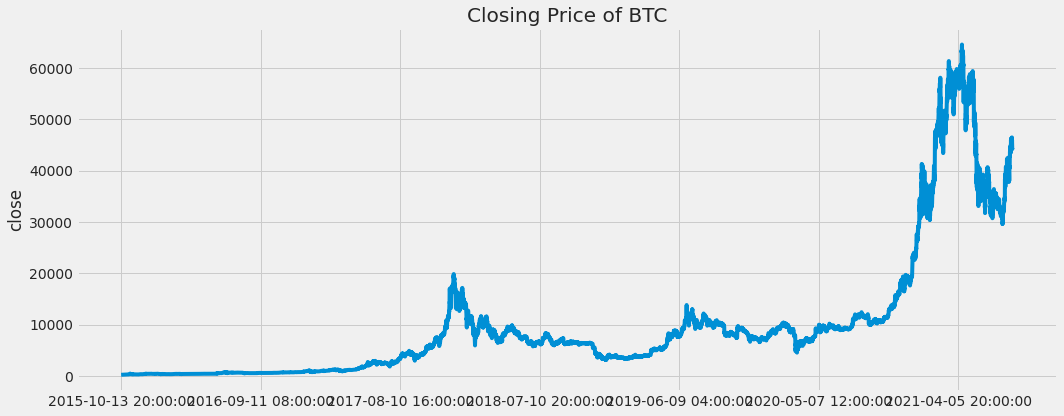

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

data['close'].plot()
plt.ylabel('close')
plt.xlabel(None)
plt.title(f"Closing Price of {coin_selection}")
    
plt.tight_layout()

### Volumes traded

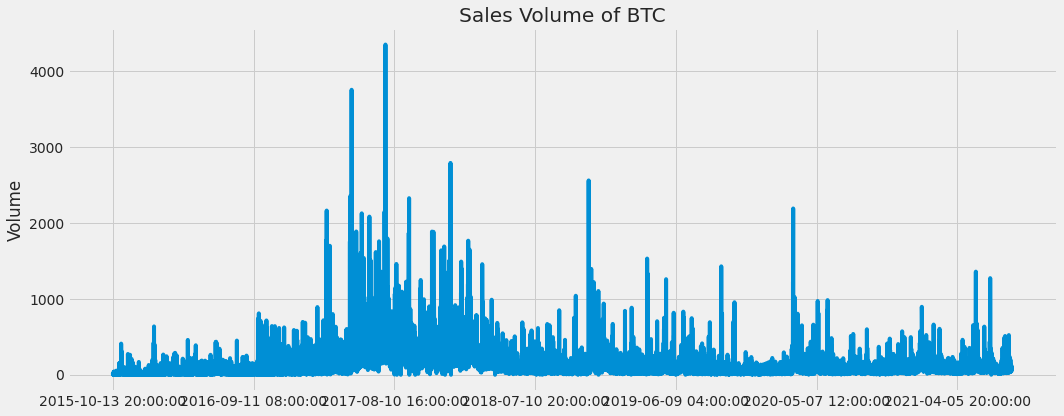

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

data['volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of BTC")
    
plt.tight_layout()

In [11]:
data

,open,high,low,close,volume,log_open,log_high,log_low,log_close,ema12,ema21,ema26,ema50,ema34,ema55,rsi,K,D,sma,bollinger_up,bollinger_down,vol_roc,4h Return,4h Gradient,boll_width,stoch_rsi
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-13 20:00:00,250.35,250.42,250.00,250.42,4.212360,5.522860,5.523140,5.521461,5.523140,249.099717,248.335037,248.070267,247.450021,247.779579,247.383678,62.138793,40.155130,46.356355,248.0515,251.988559,244.114441,1.008111,0.000280,0.07,7.874118,43.255743
2015-10-14 00:00:00,250.42,251.08,250.42,251.00,13.965352,5.523140,5.525772,5.523140,5.525453,249.393253,248.588207,248.305871,247.639969,247.994423,247.568489,63.970662,40.046929,43.466354,248.3330,252.267876,244.398124,2.315327,0.002316,0.58,7.869751,41.756642
2015-10-14 04:00:00,251.00,251.00,250.70,251.00,12.449493,5.525453,5.525453,5.524257,5.525453,249.641291,248.816393,248.521162,247.817220,248.193034,247.741197,63.970662,44.894745,41.698935,248.5680,252.552727,244.583273,-0.108544,0.000000,0.00,7.969453,43.296840
2015-10-14 08:00:00,251.00,251.86,251.00,251.15,8.686492,5.525453,5.528873,5.525453,5.526050,249.874073,249.036367,248.730016,247.990685,248.386702,247.910291,64.486046,52.326475,45.756050,248.8105,252.804377,244.816623,-0.302261,0.000598,0.15,7.987754,49.041263
2015-10-14 12:00:00,251.15,253.00,251.15,253.00,2.049007,5.526050,5.533389,5.526050,5.533389,250.356163,249.408743,249.067443,248.248108,248.686349,248.159307,70.156196,65.489000,54.236740,249.1455,253.370047,244.920953,-0.764116,0.007366,1.85,8.449094,59.862870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12 04:00:00,45948.06,46023.08,44859.80,45289.65,89.766358,10.735267,10.736898,10.711297,10.720834,45724.558435,45334.610373,45054.798801,43717.075185,44593.205995,43460.156732,52.486887,6.135417,21.365438,45629.8145,47153.082172,44106.546828,0.800303,-0.014329,-658.41,3046.535344,13.750427
2021-08-12 08:00:00,45289.65,45663.34,44670.18,44758.93,69.830994,10.720834,10.729051,10.707061,10.709046,45576.000214,45282.275793,45032.882594,43757.932237,44602.675938,43506.541492,48.141461,6.135417,11.886482,45691.2940,46930.350348,44452.237652,-0.222081,-0.011718,-530.72,2478.112696,9.010949
2021-08-12 12:00:00,44758.93,44956.97,43923.00,44204.11,114.602881,10.709046,10.713461,10.690193,10.696573,45364.940181,45184.260721,44971.492031,43775.429404,44579.900742,43531.454653,44.036875,0.000000,4.090278,45708.6670,46844.888738,44572.445262,0.641146,-0.012396,-554.82,2272.443476,2.045139


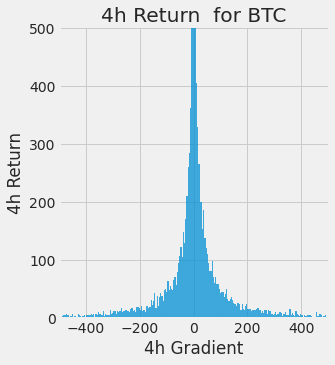

In [12]:
sns.displot(data = data, x= '4h Gradient')
plt.ylabel('4h Return')
plt.xlim([-500,500])
plt.ylim([0,500])
plt.title(f"4h Return  for {coin_selection}");

In [13]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'log_open', 'log_high',
       'log_low', 'log_close', 'ema12', 'ema21', 'ema26', 'ema50', 'ema34',
       'ema55', 'rsi', 'K', 'D', 'sma', 'bollinger_up', 'bollinger_down',
       'vol_roc', '4h Return', '4h Gradient', 'boll_width', 'stoch_rsi'],
      dtype='object')

In [14]:
#selected_features = ['close','rsi','ema20','4h Return']  # best for me
#selected_features = ['close','rsi','bollinger_up','ema21']  # best for frieda
selected_features = ['close','high','bollinger_up','rsi','ema12']#,'high'
selected_data = data[selected_features]

##  BTC Stock Price

### Temporal Train-Test Split

In [15]:
train_percentage = 95

In [16]:
train_len = int(len(selected_data) * train_percentage/100)
train_len

12136

In [17]:
data_train = selected_data[:train_len]
data_test = selected_data[train_len:]

## LSTM

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range = (0,1))

minmax_scaler.fit(data_train)

data_train_scaled = minmax_scaler.transform(data_train)
data_test_scaled = minmax_scaler.transform(data_test)

In [19]:
minmax_scaler.data_max_

array([64567.25      , 64900.        , 66272.64103673,    94.1024183 ,
       62913.8504784 ])

In [20]:
minmax_scaler.data_min_

array([250.42      , 250.42      , 251.98855888,   6.00372889,
       249.09971715])

In [21]:
min1 = minmax_scaler.data_min_[0]
min1

250.42

In [22]:
range1 = minmax_scaler.data_range_[0]
range1

64316.83

### Creating subsequences...

In [23]:
window_size = 18 # test with small window size
horizon = 1 #number of predictions into the future :) 
data_train_subsequences = []
fake_y_train = []
for k in range(len(data_train_scaled)-(window_size-1)-horizon):
    data_train_subsequences.append(data_train_scaled[k:k+window_size])
    fake_y_train.append(data_train_scaled[k+window_size])

In [24]:
X_train = np.array(data_train_subsequences)
y_train = np.array(fake_y_train)[:,0].reshape(-1,1)

In [25]:
X_train.shape

(12118, 18, 5)

In [26]:
y_train.shape

(12118, 1)

In [27]:
#with the same window_size & horizon as the train data
window_size = 18
horizon = 1
data_test_subsequences = []
fake_y_test = []
for k in range(len(data_test_scaled)-(window_size-1)-horizon):
    data_test_subsequences.append(data_test_scaled[k:k+window_size])
    fake_y_test.append(data_test_scaled[k+window_size])

In [28]:
X_test = np.array(data_test_subsequences)
y_test = np.array(fake_y_test)[:,0].reshape(-1,1)
y_test.shape

(621, 1)

### Baseline

In [29]:
# baseline predictions
X_test_last_seen_value = [_[-1][0] for _ in X_test]

In [30]:
X_test_last_seen_value_uns = np.array(X_test_last_seen_value) * range1 + min1

In [31]:
X_test_last_seen_value_uns = X_test_last_seen_value_uns.reshape(-1,1)

In [32]:
y_test_unscaled = y_test * range1 + min1

In [33]:
np.mean(np.abs(y_test_unscaled - X_test_last_seen_value_uns))

577.1352979066024

### Baseline mape

In [34]:
baseline_mape = np.mean(np.abs((y_test_unscaled - X_test_last_seen_value_uns) / y_test_unscaled)) *100

In [35]:
baseline_mape 

1.4716527822480265

### LSTM

#### RNN Architecture

In [36]:
# def create_model():
    
#     # Define architecture without input shape yet, as we don't know the shape post preprocessing
#     model = Sequential()

#     model.add(layers.LSTM(units=128,
#                      return_sequences = True,
#                      activation = "tanh"
#                     #activation = "relu"
#                      #input_shape = X_train[0].shape)
#                      ))

#     model.add(layers.LSTM(units=64,
#                       return_sequences = False,
#                       activation = "relu"  
#                     #activation = "relu"
#                      ))

#     model.add(layers.Dense(32,
#                         activation = "tanh" 
#                        #activation="relu"
#                       ))
#     model.add(layers.Dense(8,
#                        activation = "relu"
#                        #activation="relu"
#                       ))
#     model.add(layers.Dense(1,
#                       activation = "relu" 
#                       #activation="relu"
#                       ))
#     # Compile model
#     model.compile(loss='mse', 
#                   optimizer='adam', 
#                   metrics='mae')
#     return model
    



In [37]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score

In [38]:
# '''
# Then, let's apply a "mask" to disguise this model as a Scikit Learn estimator
# '''
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# model_cv = KerasRegressor(build_fn=create_model, 
#                         epochs=10, 
#                         batch_size=32, 
#                         verbose=0)





In [39]:
# %%time
# '''
# Now, your deep learning model is seen as SKLearn estimator
# You can **cross_validate** it and even **cross_val_score** it.
# '''
# from sklearn.model_selection import cross_validate


# cv_results = cross_validate(model_cv, X_train, y_train, cv=10, n_jobs=-1, scoring="neg_mean_absolute_error")

In [40]:
# -cv_results["test_score"]

In [41]:
# np.mean(-cv_results["test_score"])

In [42]:
# plt.plot(-cv_results["test_score"])

In [43]:
# np.std(-cv_results["test_score"])

In [44]:
#from tensorflow.keras import metrics

#my_mae = metrics.MeanAbsoluteError(
    #name='mean_absolute_error', dtype=None)


##### Standar RNN Model

In [45]:
# from tensorflow.keras import Sequential, layers

# # Build the LSTM model
# model = Sequential()

# model.add(layers.LSTM(units=128,
#                      return_sequences = True,
#                      activation = "tanh"
#                     #activation = "relu"
#                      #input_shape = X_train[0].shape)
#                      ))

# model.add(layers.LSTM(units=64,
#                       return_sequences = False,
#                       activation = "relu"  
#                     #activation = "relu"
#                      ))

# # model.add(layers.Dense(25,
# #                          activation="relu"))
# model.add(layers.Dense(32,
#                         activation = "tanh" 
#                        #activation="relu"
#                       ))
# #model.add(layers.Dense(16,activation="relu"))
# model.add(layers.Dense(8,
#                        activation = "relu"
#                        #activation="relu"
#                       ))
# model.add(layers.Dense(1,
#                       activation = "relu" 
#                       #activation="relu"
#                       ))

# #model.summary()



##### Best Model till now 1.5% Accuracy

In [46]:
# from tensorflow.keras import Sequential, layers
# from tensorflow.keras.layers import Dropout

# # Build the LSTM model
# model = Sequential()

# model.add(layers.LSTM(units=21,return_sequences = True,activation = "tanh"))

# model.add(layers.LSTM(units=64,return_sequences = False,activation = "relu"))

# model.add(layers.Dense(32,activation = "tanh" ))

# model.add(layers.Dense(1,activation = "relu"))

##### Test with other layers configuration

In [47]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dropout

# Build the LSTM model
model = Sequential()

model.add(layers.LSTM(units=160,
                     return_sequences = True,
                    activation = "tanh"
                    #activation = "relu"
                     #,input_shape = X_train[0].shape)
                     ))
#model.add(Dropout(0.1))

model.add(layers.LSTM(units=256,
                      return_sequences = True,
                      #activation = "tanh"  
                    activation = "relu"
                     ))

model.add(layers.LSTM(units=288,
                      return_sequences = False,
                      #activation = "tanh"  
                    activation = "relu"
                     ))
#model.add(Dropout(0.5))
# model.add(layers.Dense(25,
#                          activation="relu"))
model.add(layers.Dense(256,
                       activation = "tanh" 
                       #activation="relu"
                      ))
#model.add(layers.Dense(16,activation="relu"))
# model.add(layers.Dense(8,
#                        activation = "relu"
#                        #activation="relu"
#                       ))
model.add(layers.Dense(160,
                       #activation = "tanh" 
                       activation="relu"
                      ))
model.add(layers.Dense(1,
                      activation = "relu" 
                      #activation="relu"
                      ))

#model.summary()

2021-09-02 13:21:28.383501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-02 13:21:28.383554: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-02 13:21:28.383568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-QQH7A32G): /proc/driver/nvidia/version does not exist
2021-09-02 13:21:28.383815: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
model.compile(loss="mse",
             optimizer = "adam",#rmsprop
             metrics = "mae"#[my_mae]
             )

#### Training

In [49]:
from tensorflow.keras.callbacks import EarlyStopping 

es = EarlyStopping(patience = 5, restore_best_weights=True, monitor = "mae")
#monitor = "val_mean_absolute_error"

history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    batch_size=16,
                    epochs=30,
                    verbose = 1,
                    callbacks = [es])

2021-09-02 13:21:28.460017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
606/606 [==============================] - 35s 53ms/step - loss: 8.7100e-05 - mae: 0.0056 - val_loss: 0.0044 - val_mae: 0.0365
Epoch 2/30
606/606 [==============================] - 38s 62ms/step - loss: 4.4159e-05 - mae: 0.0046 - val_loss: 0.0019 - val_mae: 0.0238
Epoch 3/30
606/606 [==============================] - 39s 65ms/step - loss: 2.7762e-05 - mae: 0.0036 - val_loss: 0.0028 - val_mae: 0.0276
Epoch 4/30
606/606 [==============================] - 40s 67ms/step - loss: 3.6349e-05 - mae: 0.0041 - val_loss: 0.0094 - val_mae: 0.0588
Epoch 5/30
606/606 [==============================] - 40s 66ms/step - loss: 1.9496e-05 - mae: 0.0030 - val_loss: 0.0050 - val_mae: 0.0388
Epoch 6/30
606/606 [==============================] - 41s 68ms/step - loss: 2.2700e-05 - mae: 0.0033 - val_loss: 0.0017 - val_mae: 0.0233
Epoch 7/30
606/606 [==============================] - 41s 68ms/step - loss: 1.5490e-05 - mae: 0.0027 - val_loss: 0.0017 - val_mae: 0.0228
Epoch 8/30
606/606 [==============

In [50]:
#def plot_loss_mae(history):
    
    #fig, ax =plt.subplots(1,2,figsize=(20,5))
    
    # --- LOSS
    
    #ax[0].plot(history.history['loss'])
    #ax[0].plot(history.history['val_loss'])
    #ax[0].set_title('Model loss')
    #ax[0].set_xlabel('Epoch')
    #ax[0].set_ylabel('Loss')
    #ax[0].legend(['Train', 'Val'], loc='upper right')
    #ax[0].grid(axis="x",linewidth=0.5)
    #ax[0].grid(axis="y",linewidth=0.5)
    
#     # --- MAE

    #ax[1].plot(history.history['mean_absolute_error'])
    #ax[1].plot(history.history['val_mean_absolute_error'])
    #ax[1].set_title('Model MAE', fontsize = 18)
    #ax[1].set_xlabel('Epoch', fontsize = 14)
    #ax[1].set_ylabel('Recall', fontsize = 14)
    #ax[1].legend(['Train', 'Val'], loc='lower right') 
    #ax[1].grid(axis="x",linewidth=0.5)
    #ax[1].grid(axis="y",linewidth=0.5)   
    
    #plt.show()
    

In [51]:
#plot_loss_mae(history)

#### Evaluating

In [52]:
# res = model.evaluate(X_test, y_test, verbose = 1)
# res


#### Predictions

In [53]:
predictions = model.predict(X_test)
#len(predictions), len(y_test)

In [54]:
predictions[0:3]

array([[0.734291  ],
       [0.72352844],
       [0.74158114]], dtype=float32)

In [55]:
y_test_unscaled = y_test * range1 + min1

In [56]:
predictions_unscaled = predictions * range1 + min1

In [57]:
# print(pd.DataFrame(y_test_unscaled).tail(5))
# print(pd.DataFrame(predictions_unscaled).tail(5))

The operation computed during a `MinMaxScaler` Operation is:

$$x_{scaled} = \frac{x - x_{min}}{x_{max}- x_{min}}$$

To descale it:

$$x = x_{scaled} * (x_{max}- x_{min}) + x_{min}$$

Or use the `inverse_transform` directly provided...

In [58]:
np.mean(np.abs(y_test_unscaled - predictions_unscaled))

3558.3444997987135

In [59]:
np.mean(np.abs((y_test_unscaled - predictions_unscaled) / y_test_unscaled)) *100

8.310278347665975

In [60]:
y_test_unscaled.shape

(621, 1)

In [61]:
predictions_unscaled.shape

(621, 1)

In [62]:
# loss = np.mean(tf.keras.losses.mean_absolute_percentage_error(y_test_unscaled, predictions_unscaled))


In [63]:
import matplotlib.pyplot as plt


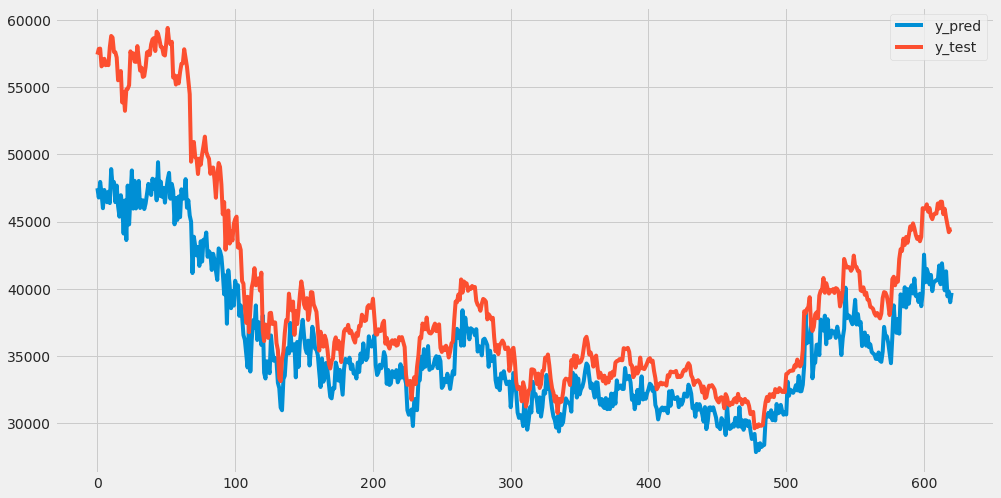

In [64]:
fig = plt.figure(figsize=(15, 8))

plt.plot(predictions_unscaled, label = "y_pred")
plt.plot(y_test_unscaled, label = "y_test")
plt.legend()
plt.show()

#### Saving Model

In [65]:
#import joblib
#from tensorflow.keras.models import load_model, save_model

#save_model(model, "1_09___pro_accuracy_model")

In [66]:
#save_model(model, "1_09___pro_accuracy_model_2", save_format="h5")

In [67]:
#model.save("1_2___pro_accuracy_model", save_format="h5")

In [68]:
stop stop 

SyntaxError: invalid syntax (958000207.py, line 1)

### Test Model on Coingecko

In [ ]:
import requests

In [ ]:
def get_coingecko():
    #ohlc
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/ohlc?vs_currency=usd&days=30"
    response = requests.get(url).json()
    #cleaning
    data_api = pd.DataFrame(response, columns = ['unix_time','open', 'high', 'low', 'close'])
    data_api["Date"] = pd.to_datetime(data_api["unix_time"], unit='ms')
    data_api = data_api.drop(columns='unix_time').set_index('Date')

    #volume
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
    response = requests.get(url).json()

    volume = pd.DataFrame(response['total_volumes'], columns=["unix_time","volume"])
    volume['date'] = pd.to_datetime(pd.to_datetime(volume['unix_time'],unit='ms').dt.strftime("%Y/%m/%d, %H:00:00"))
    volume = volume.drop(columns='unix_time').set_index('date')

    #resample hourly into 4h
    volume = volume.resample("4H").mean()

    #concatinate
    volume = volume[-180:]
    data_api = data_api[-181:-1]
    full = pd.concat([data_api, volume], axis=1)
    full.columns=['open', 'high', 'low', 'close', 'volume']

    for x in ['open', 'high', 'low', 'close']:
        full[f'log_{x}'] = full[x].apply(lambda x: np.log(x))

    data_api = full.copy()

    return data_api

In [ ]:
coingecko = get_coingecko()


In [ ]:
coingecko.head()

In [ ]:
add_ema(coingecko)

rsi = computeRSI(coingecko)

stoch_rsi(rsi)

add_stoch_rsi(coingecko)

prices = coingecko["close"]

get_bollinger_bands(prices, rate=20)

add_bollinger(coingecko,prices)

add_vol_roc(coingecko)


In [ ]:
coingecko['4h Return'] = coingecko['close'].pct_change()
coingecko['4h Gradient'] = coingecko['close'].diff()

In [ ]:
selected_features = ['close','rsi','bollinger_up','4h Return']
coingecko = coingecko[selected_features]
coingecko.tail(18)

### Test based on 1 window_size and 1 prediction (4 hours in de future) with Coingecko Data

In [ ]:
X_gecko = coingecko.dropna()[-18:]

In [ ]:
X_gecko.shape

In [ ]:
x_gecko_scaled = minmax_scaler.transform(X_gecko)

In [ ]:
x_gecko_scaled_reshaped = x_gecko_scaled.reshape(1,18,4) #18 is the window size, 9 is number of features. 

In [ ]:
predictions_api = model.predict(x_gecko_scaled_reshaped)

In [ ]:
predictions_api

In [ ]:
predictions_api_unscaled = predictions_api * range1 + min1 

In [ ]:
predictions_api_unscaled


### Creating X_test_gecko and y_test_gecko

In [ ]:
X_test_gecko = coingecko.dropna()[-144:]

In [ ]:
print(X_test_gecko.head(1))
print(X_test_gecko.tail(1))

In [ ]:
X_test_gecko_scaled = minmax_scaler.transform(X_test_gecko)

In [ ]:
X_test_gecko.shape

In [ ]:
#with the same window_size & horizon as the train data
window_size = 18
horizon = 1
X_test_gecko_sub = []
fake_y_test_gecko_sub = []
for k in range(len(X_test_gecko_scaled)-(window_size-1)-horizon):
    X_test_gecko_sub.append(X_test_gecko_scaled[k:k+window_size])
    fake_y_test_gecko_sub.append(X_test_gecko_scaled[k+window_size])

In [ ]:
X_test_gecko_np = np.array(X_test_gecko_sub)
y_test_gecko_np = np.array(fake_y_test_gecko_sub)[:,0].reshape(-1,1)

In [ ]:
print(X_test_gecko_np.shape)
print(y_test_gecko_np.shape)

In [ ]:
predictions_gecko = model.predict(X_test_gecko_np)

In [ ]:
predictions_gecko_unscaled = predictions_gecko * range1 + min1

In [ ]:
predictions_gecko_unscaled

In [ ]:
y_test_gecko_unscaled = y_test_gecko_np * range1 + min1

In [ ]:
np.mean(np.abs(y_test_gecko_unscaled - predictions_gecko_unscaled))

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(predictions_gecko_unscaled, label = "y_pred_gecko")
plt.plot(y_test_gecko_unscaled, label = "y_real_gecko")
plt.legend()
plt.show()

## Second round

In [ ]:
stop stop stop 

In [ ]:
dataset = data[["close"]].values
dataset

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
length = 60
horizon  = 1

training_split = 0.85
training_data_length = int(np.ceil(len(dataset) * training_split))
training_data_length

In [ ]:
# Create the training data set 
# Create the scaled training data set

train_data = scaled_data[0:int(training_data_length), :]
# Split the data into x_train and y_train data sets
y_train = []

x_train = [train_data[i-length:i, 0] for i in range(length, len(train_data))]
y_train = [train_data[i, 0] for i in range(length, len(train_data))]
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 543 to 2002 
test_data = scaled_data[training_data_length - length: , :]
# Create the data sets x_test and y_test

y_test = dataset[training_data_length:, :]
x_test = [test_data[i-length:i, 0] for i in range(length, len(test_data))]
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = my_mae)

# Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=5, validation_split = 0.4)

In [ ]:
plot_loss_mae(history)

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[:3]

In [ ]:
y_test.shape, predictions.shape

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
# Plot the data
train = selected_data[:training_data_length]
valid = selected_data[training_data_length:].copy()

In [ ]:
train

In [ ]:
valid

In [ ]:
valid["Predictions"] = predictions
valid

In [ ]:
valid.index = pd.to_datetime(valid.index, format = "%Y-%m-%d %H:%M:%S")
train.index = pd.to_datetime(train.index, format = "%Y-%m-%d %H:%M:%S")

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim([datetime.date(2020, 1, 1), datetime.datetime.now()])
plt.show()